In [7]:
from expectation.seqtest.sequential_e_testing import SequentialTest, TestType
from expectation.utils.helper_functions import plot_sequential_test

import numpy as np

import matplotlib.pyplot as plt

In [2]:
test = SequentialTest(test_type="mean", null_value=0, alternative="greater")

In [3]:
result = test.update([1.2, 0.8, 1.5])

In [4]:
result

SequentialTestResult(reject_null=False, e_value=7.38905609893065, e_process=EProcess(values=[7.38905609893065], cumulative_value=7.38905609893065, total_samples=1, config=EValueConfig(significance_level=0.05, allow_infinite=False)), sample_size=3, p_value=0.1353352832366127, confidence_bounds=None, test_type=<TestType.MEAN: 'mean'>, alternative=<AlternativeType.GREATER: 'greater'>, timestamp=1731162839.0)

In [5]:
print(f"Reject null: {result.reject_null}")
print(f"E-value: {result.e_value}")
print(f"Cumulative e-value: {result.e_process.cumulative_value}")

Reject null: False
E-value: 7.38905609893065
Cumulative e-value: 7.38905609893065


Batch mean: 0.84
E-value: 2.74
Cumulative: 2.74
Reject H0: False

Batch mean: 1.14
E-value: 3.63
Cumulative: 9.92
Reject H0: False

Batch mean: 1.20
E-value: 8.27
Cumulative: 82.07
Reject H0: True

Batch mean: 0.88
E-value: 6.59
Cumulative: 541.00
Reject H0: True

Batch mean: 0.44
E-value: 0.55
Cumulative: 299.53
Reject H0: True

Batch mean: 0.48
E-value: 0.80
Cumulative: 238.26
Reject H0: True

Batch mean: 0.46
E-value: 0.70
Cumulative: 167.16
Reject H0: True



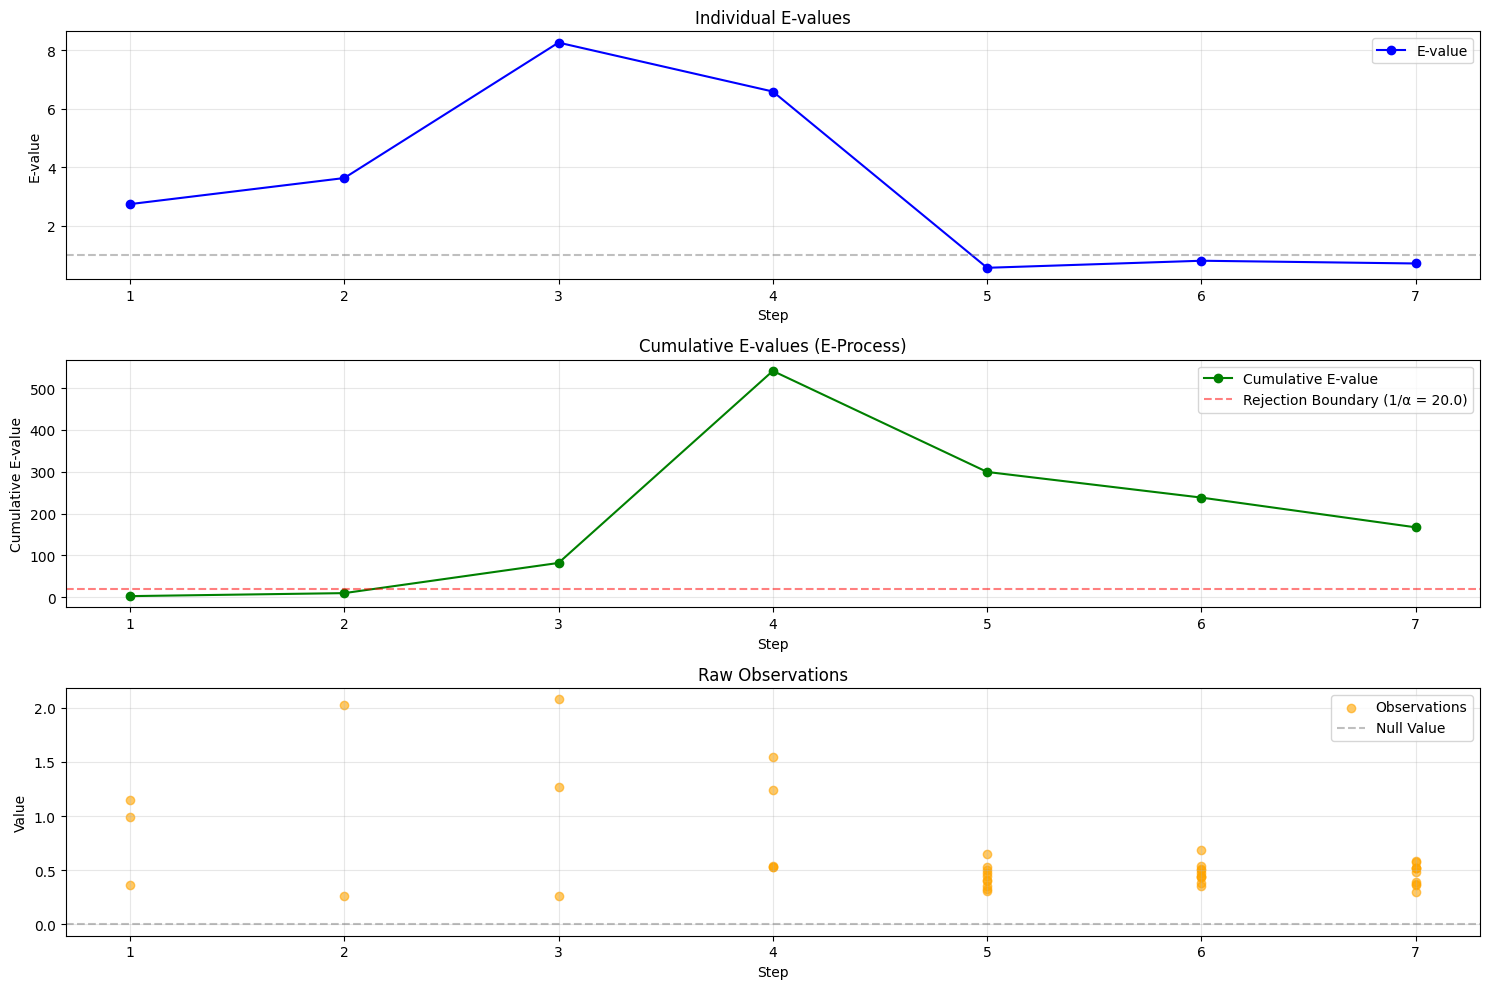

In [15]:

test = SequentialTest(
    test_type=TestType.MEAN,
    null_value=0,
    alternative="greater"
)

# Generate some data
np.random.seed(42)
data_batches = [
    np.random.normal(0.5, 1, 3),  # Batch 1
    np.random.normal(0.5, 1, 2),  # Batch 2
    np.random.normal(0.5, 1, 3),  # Batch 3
    np.random.normal(1, 1, 5),    # Batch 4
    np.random.normal(0.5, 0.1, 10),
    np.random.normal(0.5, 0.1, 10),
    np.random.normal(0.5, 0.1, 10),
]

# Run test
for batch in data_batches:
    result = test.update(batch)
    print(f"Batch mean: {np.mean(batch):.2f}")
    print(f"E-value: {result.e_value:.2f}")
    print(f"Cumulative: {result.e_process.cumulative_value:.2f}")
    print(f"Reject H0: {result.reject_null}\n")

# Plot results
history_df = test.get_history_df()
fig, axes = plot_sequential_test(history_df)
plt.show()